In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Topgun/dataset/Apple3.csv', encoding='utf-8')
sugar = df['SUGAR']

In [ ]:
data_dict = { 'apple': [], 'imageName':[], 'label':[], 'path':[]}
   
for i in range(200):     #0-159
  for j in range(1, 7):
    filename = str(i+1)+'-'+str(j)+'.JPG'
    img_path = '/content/drive/Shareddrives/Topgun/dataset/train'+'/'+filename
    data_dict['path'].append(img_path)
    data_dict['imageName'].append(filename)
    data_dict['label'].append(sugar[i])
    data_dict['apple'].append(i+1)
  
apple_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', apple_df)
    
apple_df.to_csv("train.csv", mode='w')


<data frame>
       apple  imageName label  \
0         1    1-1.JPG  HIGH   
1         1    1-2.JPG  HIGH   
2         1    1-3.JPG  HIGH   
3         1    1-4.JPG  HIGH   
4         1    1-5.JPG  HIGH   
...     ...        ...   ...   
1195    200  200-2.JPG   LOW   
1196    200  200-3.JPG   LOW   
1197    200  200-4.JPG   LOW   
1198    200  200-5.JPG   LOW   
1199    200  200-6.JPG   LOW   

                                                   path  
0     /content/drive/Shareddrives/Topgun/dataset/tra...  
1     /content/drive/Shareddrives/Topgun/dataset/tra...  
2     /content/drive/Shareddrives/Topgun/dataset/tra...  
3     /content/drive/Shareddrives/Topgun/dataset/tra...  
4     /content/drive/Shareddrives/Topgun/dataset/tra...  
...                                                 ...  
1195  /content/drive/Shareddrives/Topgun/dataset/tra...  
1196  /content/drive/Shareddrives/Topgun/dataset/tra...  
1197  /content/drive/Shareddrives/Topgun/dataset/tra...  
1198  /content/drive

In [ ]:
pd.set_option('display.max_colwidth', 200)
data_df = apple_df
print('data_df shape:', data_df.shape)
data_df.head()

data_df shape: (1200, 4)


,apple,imageName,label,path
0,1,1-1.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-1.JPG
1,1,1-2.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-2.JPG
2,1,1-3.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-3.JPG
3,1,1-4.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-4.JPG
4,1,1-5.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-5.JPG


In [ ]:
print(data_df.shape)

data_df['label'].value_counts()

(1200, 4)


HIGH      666
MEDIUM    330
LOW       204
Name: label, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

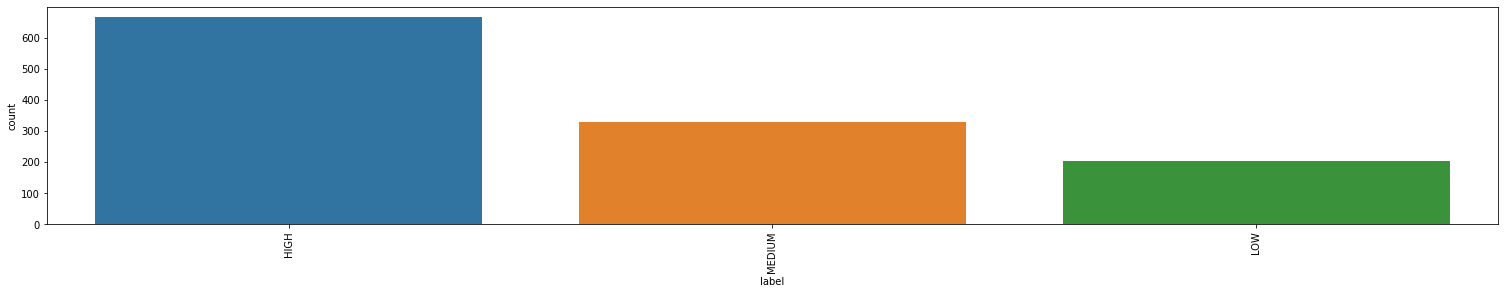

In [ ]:
from ast import increment_lineno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26, 4))

sns.countplot(data=data_df, x='label')
plt.xticks(rotation=90)

In [ ]:
import cv2

def show_sugar_images(image_path_list, ncols=3, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)

In [ ]:
import albumentations as A

imsi_augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    #A.CenterCrop(height=200, width=200, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5)
])


# image size 224x224 resize 적용. 
def show_sugar_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 

In [ ]:
data_df['label'].value_counts().index.tolist()

['HIGH', 'MEDIUM', 'LOW']

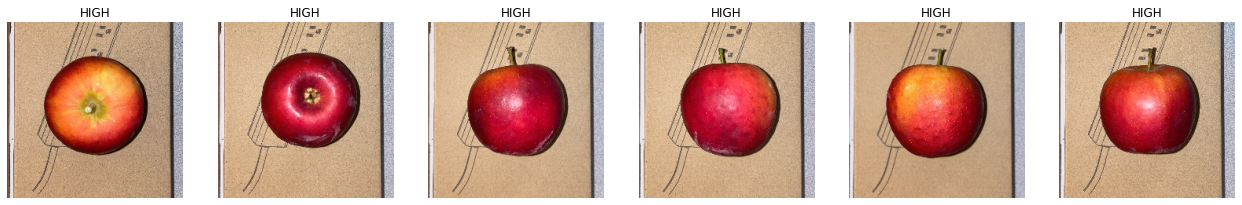

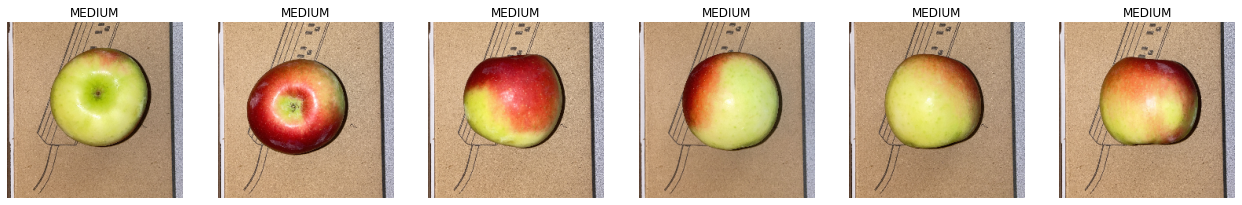

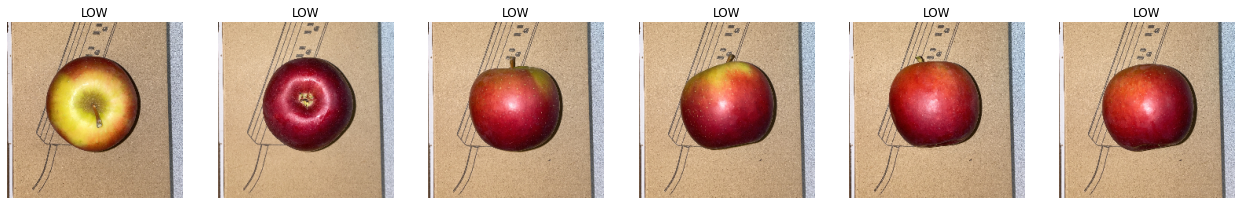

In [ ]:
sugar_list = data_df['label'].value_counts().index.tolist()

for iter_cnt, sugar in enumerate(sugar_list):
    sugar_image_list = data_df[data_df['label']==sugar]['path'].iloc[:6].tolist()
    show_sugar_images(sugar_image_list, ncols=6, title=sugar)
    if iter_cnt == 8:
        break

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size=0.2, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(960, 4) (240, 4)


In [ ]:
print(train_df['label'].value_counts()/train_df.shape[0])
print(test_df['label'].value_counts()/test_df.shape[0])

HIGH      0.555208
MEDIUM    0.275000
LOW       0.169792
Name: label, dtype: float64
HIGH      0.554167
MEDIUM    0.275000
LOW       0.170833
Name: label, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

train_path = train_df['path'].values

train_label = pd.get_dummies(train_df['label']).values
 
tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify=train_label, test_size=0.2, random_state=0)
print('training path shape:', tr_path.shape, 'validation path shape:', val_path.shape, 
      'training label shape:', tr_label.shape, 'validation label shape:', val_label.shape)

학습용 path shape: (768,) 검증용 path shape: (192,) 학습용 label shape: (768, 3) 검증용 label shape: (192, 3)


In [ ]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Sugar_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data
        self.shuffle = shuffle
        if self.shuffle:
            #self.on_epoch_end()
            pass
    
    def __len__(self):
        return int(np.ceil(len(self.labels) / self.batch_size))
    

    def __getitem__(self, index):
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        

        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            image = cv2.resize(image, (self.image_size, self.image_size))
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch

    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

In [ ]:
import albumentations as A

augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
# Xception(Preprocess_input)

from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                       augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]
print(tr_image_batch.shape, val_image_batch.shape)

print(tr_image_batch[:1])
print(val_image_batch[:1])

(64, 224, 224, 3) (64, 224, 224, 3)
[[[[ 0.20784318  0.5058824   0.05882359]
   [ 0.32549024  0.6156863   0.18431377]
   [ 0.28627455  0.5764706   0.15294123]
   ...
   [-0.25490195 -0.1607843  -0.54509807]
   [ 0.0196079   0.12156868 -0.23921567]
   [-0.29411763 -0.1607843  -0.5137255 ]]

  [[ 0.3411765   0.6392157   0.19215691]
   [ 0.26274514  0.5529412   0.12941182]
   [ 0.27843142  0.5764706   0.14509809]
   ...
   [-0.16862744 -0.06666666 -0.41176468]
   [-0.2862745  -0.18431371 -0.5294118 ]
   [-0.2862745  -0.15294117 -0.4980392 ]]

  [[ 0.2941177   0.5921569   0.14509809]
   [ 0.26274514  0.56078434  0.11372554]
   [ 0.27058828  0.5686275   0.12156868]
   ...
   [-0.23137254 -0.11372548 -0.45098037]
   [-0.26274508 -0.12941176 -0.4588235 ]
   [-0.19215685 -0.05098039 -0.3490196 ]]

  ...

  [[-0.16862744  0.09019613 -0.54509807]
   [-0.20784312  0.05098045 -0.58431375]
   [-0.20784312  0.05098045 -0.58431375]
   ...
   [-0.4588235  -0.29411763 -0.5529412 ]
   [-0.45098037 -0.28

In [ ]:
import time

tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

start = time.time()
for value1, value2 in iter(tr_ds):
    end = time.time()
    print(end - start)
    start = end

5.493598222732544
82.88649773597717
83.34754633903503
72.42481279373169
83.22106766700745
82.57387089729309
83.8239197731018
74.04987215995789
78.57890129089355
73.46412801742554
78.67576169967651
74.38242506980896


In [ ]:
# Pretrained model
# Xception,ResNet50V2, EfficientNetB0, EfficientNetB1

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf


def create_model(model_type='xception', in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Topgun/dataset/Apple3.csv', encoding='utf-8')
sugar = df['SUGAR']

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

import albumentations as A

IMAGE_DIR = '/content/drive/Shareddrives/Topgun/dataset/train' 

def make_sugar_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for i in range(200):     #0-159
      for j in range(1, 7):
        filename = str(i+1)+'-'+str(j)+'.JPG'
        file_path = '/content/drive/Shareddrives/Topgun/dataset/train'+'/'+filename
        paths.append(file_path)
        label_gubuns.append(sugar[i])

    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df

def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label


BATCH_SIZE = 64
IMAGE_SIZE = 224


class Sugar_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data
        self.shuffle = shuffle
        if self.shuffle:
            pass

    def __len__(self):
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    def __getitem__(self, index):
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            image = cv2.resize(image, (self.image_size, self.image_size))
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch

    def on_epoch_end(self):
        if(self.shuffle):
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass
        
        
augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
N_EPOCHS = 30

def train_model(model_type, train_df, initial_lr=0.001, augmentor=None, input_pre_func=None):
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=input_pre_func)

    print('#######', model_type, ' generate and train ########')
    model = create_model(model_type=model_type)
    model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])

    rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
    
    ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
    
    history = model.fit(tr_ds, epochs=N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
                   validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
                   callbacks=([rlr_cb, ely_cb]), verbose=1)
    
    return model, history

IMAGE_DIR = '/content/drive/Shareddrives/Topgun/dataset/train' 

data_df = make_sugar_dataframe(image_dir=IMAGE_DIR)
train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(720, 2) (480, 2)


In [ ]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

xception_model, xception_history = train_model(model_type='xception', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light,
                             input_pre_func=xcp_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### xception  생성 및 학습 수행 ########


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30


In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_df['gt_class'] = np.argmax(test_label, axis=1)

In [ ]:
test_df.head()

In [ ]:
test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

xception_model.evaluate(test_ds)

In [ ]:
predict_result = xception_model.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['xcp_pred_class'] = predict_class

In [ ]:
test_df.head()

In [ ]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

In [ ]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]['label'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 4))
plt.xticks(rotation=90)

wrong_result_df = test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

sns.countplot(data=wrong_result_df, x='label')

In [ ]:
def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_t1, effb0_history_t1 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light,
                             input_pre_func=eff_preprocess_input)

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_t1.evaluate(test_ds)

In [ ]:
predict_result = effb0_model_t1.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['effb0_t1_pred_class'] = predict_class

In [ ]:
test_df.head()

In [ ]:
test_df[test_df['gt_class'] != test_df['effb0_t1_pred_class']]['label'].value_counts()